In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn # type: ignore

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

# 加载CSV文件
df = pd.read_csv('/Users/xuancaixiaotangyuan/Desktop/5507作业/cleaned_data.csv')#更换成你的文件路径

In [7]:
df.head()  # 查看前五行
df.info()  # 查看数据基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1777 non-null   object 
 1   room_type        1777 non-null   object 
 2   address          1777 non-null   object 
 3   lat              1777 non-null   float64
 4   lng              1777 non-null   float64
 5   price            1777 non-null   float64
 6   rating           1777 non-null   float64
 7   reviews_count    1777 non-null   float64
 8   bedrooms         1777 non-null   float64
 9   beds             1777 non-null   float64
 10  bathrooms        1777 non-null   float64
 11  person_capacity  1777 non-null   float64
 12  region           1777 non-null   object 
dtypes: float64(9), object(4)
memory usage: 180.6+ KB


In [9]:
pip install zhconv

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from zhconv import convert

# 加载数据
file_path = '/Users/xujingyi/Desktop/爱彼迎/airbnb_data_20241119_125147.csv'  # 替换为你的实际路径
data = pd.read_csv(file_path)

# 确保 address 列是字符串类型，并处理空值
data['address'] = data['address'].fillna('').astype(str)

# 将 address 列中的繁体字转换为简体字
data['address'] = data['address'].apply(lambda x: convert(x, 'zh-cn'))  # 繁体转简体

# 区域关键词映射
region_mapping = {
    '台北市': ['台北', 'Taipei'],
    '新北市': ['新北', 'New Taipei'],
    '宜兰县': ['宜兰', 'Yilan', '头城', '礁溪', '罗东', '五结', '冬山', '苏澳', '南澳', '大同', '三星', '员山'],
    '桃园市': ['桃园', 'Taoyuan', '中坜', '平镇', '杨梅', '芦竹', '大溪', '大园', '观音', '龟山'],
    '台中市': ['台中', 'Taichung', '大甲', '清水', '梧栖', '沙鹿', '龙井', '丰原', '东势', '大雅', '后里'],
    '台南市': ['台南', 'Tainan', '永康', '新化', '善化', '仁德', '关庙', '新市', '麻豆', '佳里', '西港'],
    '高雄市': ['高雄', 'Kaohsiung', '凤山', '冈山', '旗山', '美浓', '湖内', '桥头', '大寮', '林园', '路竹'],
    '台东县': ['台东', 'Taitung', '池上', '关山', '东河', '鹿野', '太麻里', '成功', '达仁', '长滨'],
    '花莲县': ['花莲', 'Hualien', '凤林', '光复', '玉里', '新城', '秀林', '寿丰', '富里', '瑞穗', '万荣']
}

# 匹配函数
def assign_region(address):
    for region, keywords in region_mapping.items():
        if any(keyword in address for keyword in keywords):
            return region
    return ''

# 创建新列 'region'
data['region'] = data['address'].apply(assign_region)

# 显示部分结果
print(data[['address', 'region']].head(20))

# 保存为新的 CSV 文件
output_path = '/Users/xujingyi/Desktop/爱彼迎/airbnb_data_with_regions.csv'
data.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"清洗完成，文件已保存到 {output_path}")

                  address region
0          万华区, 台北市, 台湾地区    台北市
1          中山区, 台北市, 台湾地区    台北市
2          柏翠里, 新北市, 台湾地区    新北市
3          仁义里, 新北市, 台湾地区    新北市
4          宝安里, 新北市, 台湾地区    新北市
5          大同区, 台北市, 台湾地区    台北市
6          慈祐里, 台北市, 台湾地区    台北市
7          芦洲区, 新北市, 台湾地区    新北市
8          芦洲区, 新北市, 台湾地区    新北市
9          吉兴里, 新北市, 台湾地区    新北市
10         万寿里, 台北市, 台湾地区    台北市
11         中正区, 台北市, 台湾地区    台北市
12         汐止区, 新北市, 台湾地区    新北市
13         西安里, 台北市, 台湾地区    台北市
14         板桥区, 新北市, 台湾地区    新北市
15         万华区, 台北市, 台湾地区    台北市
16  台北市, Zhongzheng, 台湾地区    台北市
17         中山区, 台北市, 台湾地区    台北市
18         三芝区, 新北市, 台湾地区    新北市
19         永康里, 台北市, 台湾地区    台北市
清洗完成，文件已保存到 /Users/xujingyi/Desktop/爱彼迎/airbnb_data_with_regions.csv


In [11]:
# 加载CSV文件
data = pd.read_csv('/Users/xuancaixiaotangyuan/Desktop/5507作业/cleaned_data.csv')#更换成你的文件路径

In [13]:
# 删除空白列（全是空值的列）
data = data.dropna(axis=1, how='all')

# 查看结果
print(data.head())

                                                name room_type  \
0                                           西門復古懷舊風情      独立房间   
1                                   [限23: 00入住]未指定房型      酒店房间   
2  高級新社區環境好近江子翠捷運站，西門町僅需8分鐘車程，夜市超市生活機能完善，免治馬桶豪華公設...      独立房间   
3                                大坪林捷運站2分鐘/分租臥房/熱鬧方便      独立房间   
4                     蘆洲溫馨小屋A1｜全新裝潢/捷運步行1分鐘/另有機場接送服務      独立房间   

          address        lat         lng  price  rating  reviews_count  \
0  万华区, 台北市, 台湾地区  25.043760  121.503900  354.0    4.88          242.0   
1  中山区, 台北市, 台湾地区  25.055321  121.526322  277.0    4.32           41.0   
2  柏翠里, 新北市, 台湾地区  25.035034  121.474387  265.0    4.92           13.0   
3  宝安里, 新北市, 台湾地区  24.982885  121.543814  386.0    5.00           22.0   
4  芦洲区, 新北市, 台湾地区  25.085750  121.471470  331.0    4.90           73.0   

   bedrooms  beds  bathrooms  person_capacity region  
0       1.0   1.0        1.5              2.0    台北市  
1       1.0   1.0        1.0              2.0   

In [15]:
# 查看每一列的缺失值数量
data.isnull().sum()

# 删除含缺失值的行
data.dropna(inplace=True)

In [9]:
#保存清洗后的数据
data.to_csv('/Users/xujingyi/Desktop/爱彼迎/cleaned_data.csv', index=False)

In [17]:
#绘制地理热力图
import folium
from folium.plugins import HeatMap
import pandas as pd

# 假设经度列是 'lng'，纬度列是 'lat'
# 创建地图对象，设置初始位置和缩放级别
map_center = [data['lat'].mean(), data['lng'].mean()]  # 默认中心为数据的经纬度中心
mymap = folium.Map(location=map_center, zoom_start=12)

# 提取经度和纬度
locations = data[['lat', 'lng']].values.tolist()

# 创建热力图
HeatMap(locations).add_to(mymap)

# 保存为 HTML 文件
mymap.save('/Users/xuancaixiaotangyuan/Desktop/5507作业/heatmap.html')#更换成你的文件路径

# 如果在 Jupyter Notebook 中运行，您可以直接显示地图
mymap


In [19]:
# 计算每个地区的平均租金、标准差、最小值、最大值等统计量
region_stats = data.groupby('region')['price'].describe()

print(region_stats)

        count         mean         std    min     25%    50%      75%     max
region                                                                       
台东县     191.0   443.371728  234.904579  179.0  305.50  386.0   518.00  1984.0
台中市     231.0   413.549784  296.483119  121.0  196.00  299.0   565.00  1793.0
台北市     189.0  1047.010582  897.433130  233.0  505.00  771.0  1275.00  6617.0
台南市     366.0   382.505464  186.268693  135.0  257.00  334.0   450.75  1464.0
宜兰县     272.0   621.305147  346.737752  166.0  375.00  551.0   794.00  3279.0
新北市      59.0   590.305085  621.599778  154.0  317.00  411.0   642.00  4607.0
桃园市      92.0   758.760870  754.553072  183.0  333.00  508.0   870.50  4779.0
花莲县     219.0   456.374429  242.755411  148.0  275.00  419.0   551.00  1653.0
高雄市     158.0   318.373418  146.649262  135.0  228.75  281.5   382.75  1174.0


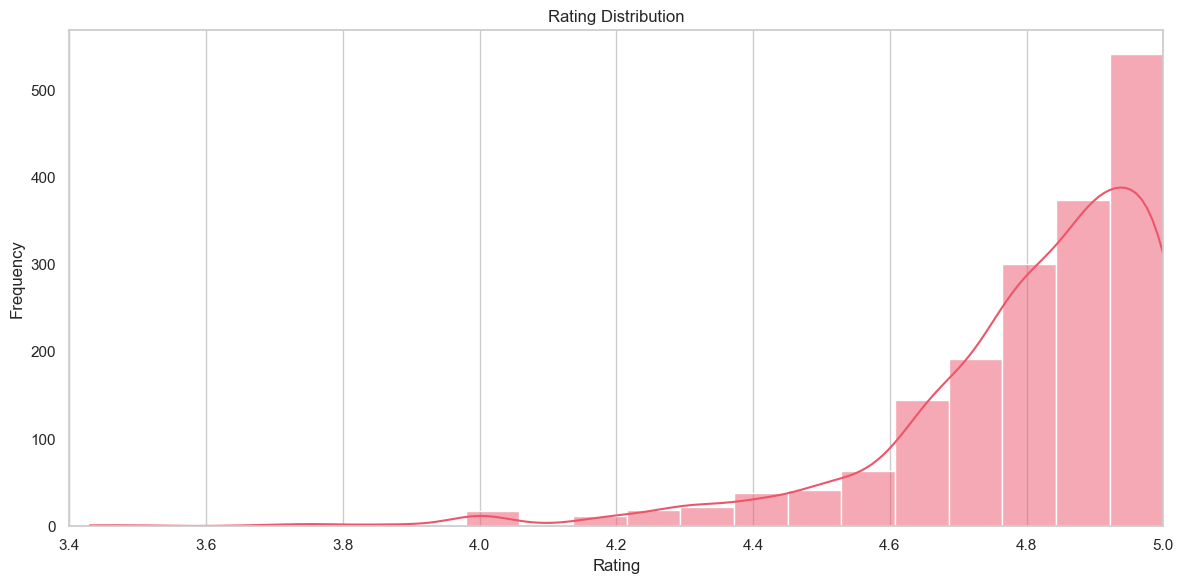

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 确保导入 FontProperties

# 设置绘图风格
sns.set(style="whitegrid")

# 指定中文字体
font_path = '/Library/Fonts/Arial Unicode.ttf'  # 替换为实际路径
font_prop = FontProperties(fname=font_path)

# 设置全局字体
plt.rcParams['font.family'] = font_prop.get_name()
# 绘制评分分布图
plt.figure(figsize=(12, 6))
sns.histplot(data['rating'], bins=20, color='#ed556a', kde=True)  # 使用指定颜色并添加核密度估计
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(3.4, 5)  # 设置 x 轴范围为 3.4 到 5
plt.grid(axis='y')

# 调整布局以避免重叠
plt.tight_layout()

# 保存图表
plt.savefig('Rating Distribution Map.png', dpi=300)  # 保存为 PNG 格式，分辨率为 300 dpi

# 显示图表
plt.show()

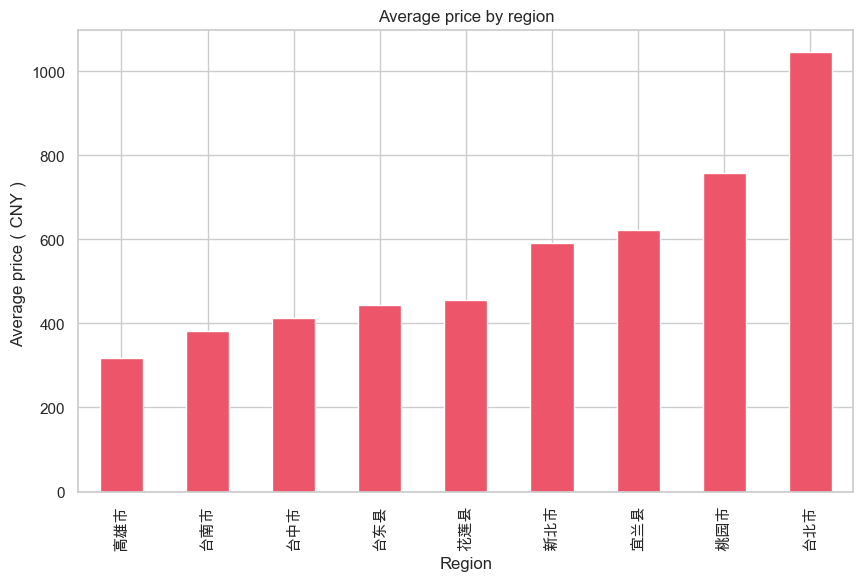

In [25]:
#各地区房费
import matplotlib.pyplot as plt
import matplotlib

# 计算每个地区的平均租金
avg_rent_by_region = data.groupby('region')['price'].mean()

# 指定中文字体
font_path = '/Library/Fonts/Arial Unicode.ttf'  # 替换为实际路径
font_prop = FontProperties(fname=font_path)

# 设置全局字体
plt.rcParams['font.family'] = font_prop.get_name()

# 绘制柱状图
plt.figure(figsize=(10, 6))
avg_rent_by_region.sort_values().plot(kind='bar', color='#ed556a')
plt.title('Average price by region')
plt.xlabel('Region')
plt.ylabel('Average price（CNY）')
plt.xticks(rotation=90)
plt.savefig('Average price by region.png', dpi=300)  # 保存为 PNG 格式，分辨率为 300 dpi
plt.show()

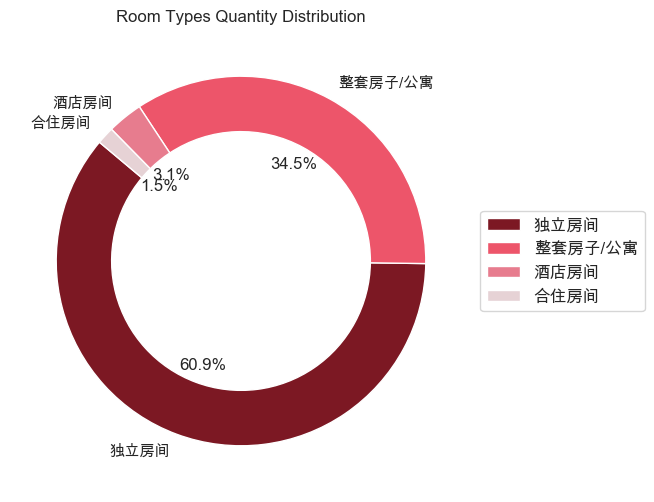

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 指定中文字体
font_path = '/Library/Fonts/Arial Unicode.ttf'  # 替换为实际路径
font_prop = FontProperties(fname=font_path)

# 设置全局字体
plt.rcParams['font.family'] = font_prop.get_name()

# 计算各房型的数量
room_type_counts = data['room_type'].value_counts()

# 颜色顺序
colors = ['#7c1823', '#ed556a', '#e77c8e', '#e6d2d5']

# 绘制圆环图
fig, ax = plt.subplots(figsize=(8, 6))  # 可以调整这里的 figsize
patches, texts, autotexts = ax.pie(room_type_counts, labels=room_type_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, 
                        wedgeprops=dict(width=0.3))

# 添加图例
ax.legend(patches, room_type_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), prop=font_prop)

ax.set_title('Room Types Quantity Distribution', fontproperties=font_prop)

# 保存图片
fig.savefig('Room Types Quantity Distribution.png', bbox_inches='tight', dpi=300)

plt.show()

/var/folders/bj/h5n725k17rvdlpcqyht5qctw0000gn/T/ipykernel_69946/2982712662.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='rating', data=data, palette=custom_palette)


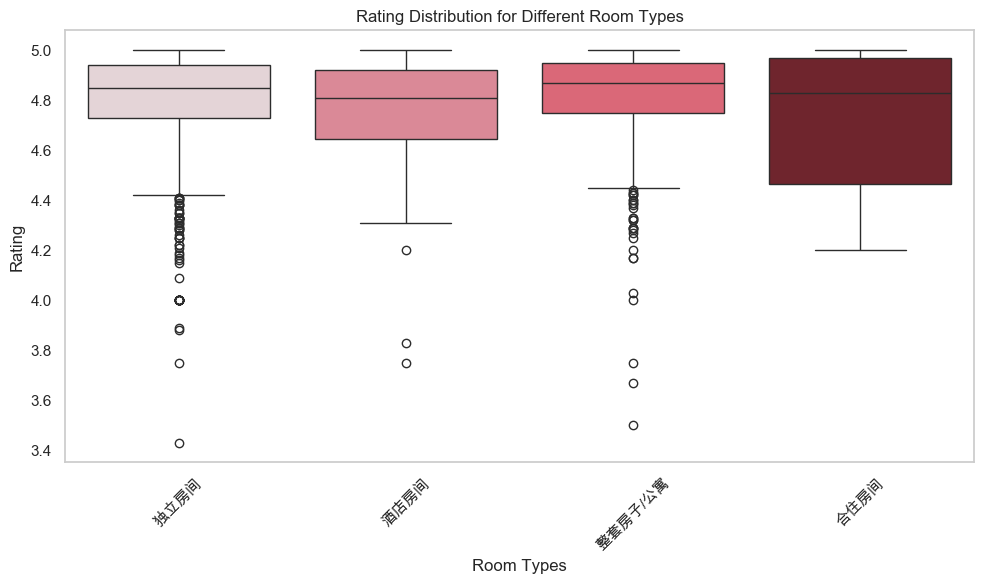

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties

# 指定中文字体
font_path = '/Library/Fonts/Arial Unicode.ttf'  # 替换为实际路径
font_prop = FontProperties(fname=font_path)

# 设置全局字体
plt.rcParams['font.family'] = font_prop.get_name()

# 加载数据
data = pd.read_csv('cleaned_data.csv')  # 确保路径正确

# 自定义颜色调色板
custom_palette = ['#e6d2d5', '#e77c8e', '#ed556a', '#7c1823']

# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='rating', data=data, palette=custom_palette)
plt.title('Rating Distribution for Different Room Types', fontproperties=font_prop)
plt.xlabel('Room Types', fontproperties=font_prop)
plt.ylabel('Rating', fontproperties=font_prop)
plt.xticks(rotation=45)
plt.grid(axis='y')

# 显示图表
plt.tight_layout()

# 保存图片
plt.savefig('Rating Distribution for Different Room Types.png', bbox_inches='tight', dpi=300)  # 使用 plt 保存图表

# 显示图表
plt.show()

/var/folders/bj/h5n725k17rvdlpcqyht5qctw0000gn/T/ipykernel_69946/1410101838.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='rating', data=data, palette=custom_palette)


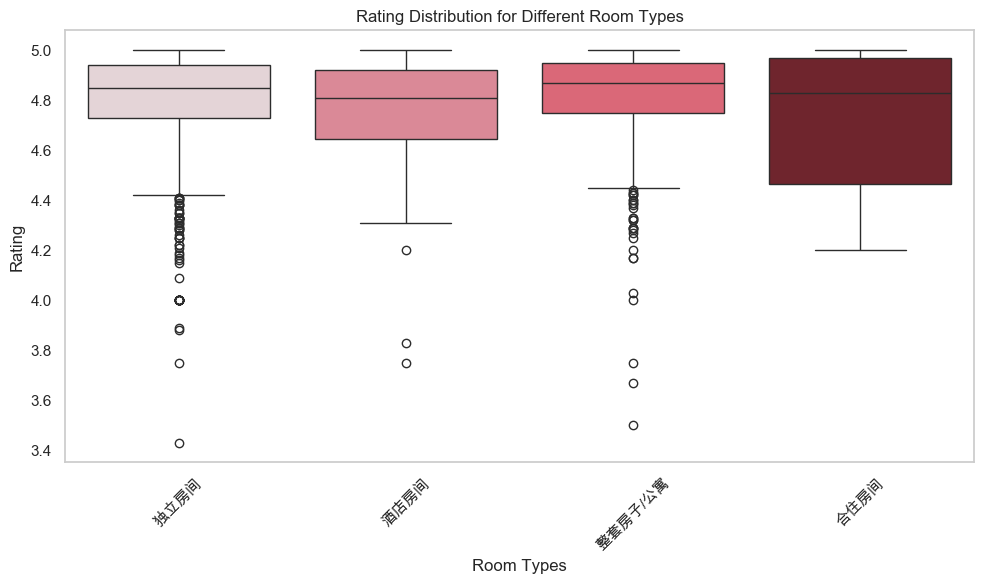

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties

# 指定中文字体
font_path = '/Library/Fonts/Arial Unicode.ttf'  # 替换为实际路径
font_prop = FontProperties(fname=font_path)

# 设置全局字体
plt.rcParams['font.family'] = font_prop.get_name()

# 加载数据
# data = pd.read_csv('/path/to/rental_data.csv')

# 自定义颜色调色板
custom_palette = ['#e6d2d5', '#e77c8e', '#ed556a', '#7c1823']

# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='rating', data=data, palette=custom_palette)
plt.title('Rating Distribution for Different Room Types', fontproperties=font_prop)
plt.xlabel('Room Types', fontproperties=font_prop)
plt.ylabel('Rating', fontproperties=font_prop)
plt.xticks(rotation=45)
plt.grid(axis='y')

# 显示图表
plt.tight_layout()

# 保存图片
fig.savefig('Rating Distribution for Different Room Types.png', bbox_inches='tight', dpi=300)

plt.show()

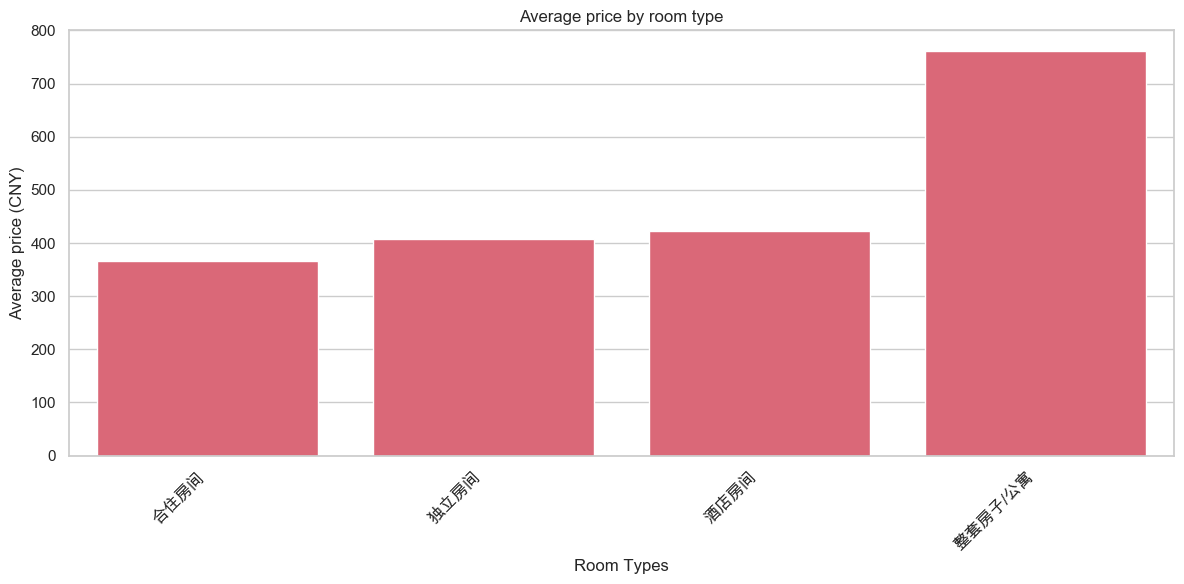

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties

# 指定中文字体
font_path = '/Library/Fonts/Arial Unicode.ttf'  # 替换为实际路径
font_prop = FontProperties(fname=font_path)

# 设置全局字体
plt.rcParams['font.family'] = font_prop.get_name()

# 加载数据
# data = pd.read_csv('/path/to/rental_data.csv')  # 确保数据路径正确

# 计算每种房源类型的平均价格
avg_price_per_room_type = data.groupby('room_type')['price'].mean().sort_values()

# 可视化：柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_room_type.index, y=avg_price_per_room_type.values, color='#ed556a')  # 设置颜色
plt.title('Average price by room type', fontproperties=font_prop)
plt.xlabel('Room Types', fontproperties=font_prop)
plt.ylabel('Average price (CNY)', fontproperties=font_prop)
plt.xticks(rotation=45, ha='right', fontproperties=font_prop)

# 保存图表为图片
plt.tight_layout()
plt.savefig('Average price by room type.png', dpi=300, bbox_inches='tight', format='png')  # 保存为 PNG 格式

# 显示图表
plt.show()

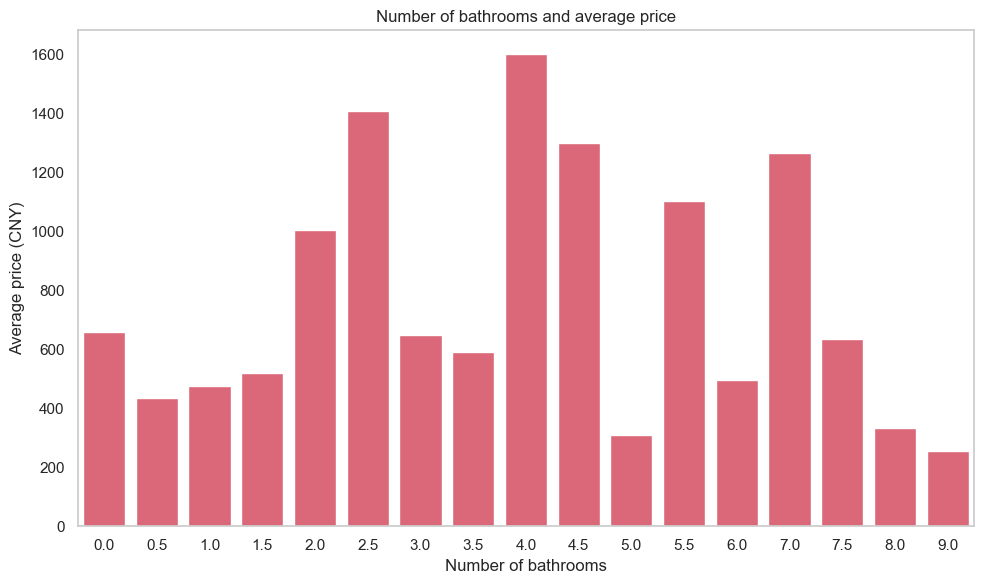

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入 FontProperties

# 创建一个透视表，计算每个卫生间数量对应的平均价格
pivot_table = data.groupby('bathrooms')['price'].mean().reset_index()

# 指定中文字体
font_path = '/Library/Fonts/Arial Unicode.ttf'  # 替换为实际字体路径
font_prop = FontProperties(fname=font_path)

# 设置全局字体
plt.rcParams['font.family'] = font_prop.get_name()

# 绘制可视化表格
plt.figure(figsize=(10, 6))
sns.barplot(x='bathrooms', y='price', data=pivot_table, color='#ed556a')  # 使用指定颜色
plt.title('Number of bathrooms and average price')
plt.xlabel('Number of bathrooms')
plt.ylabel('Average price (CNY)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# 显示图表
plt.tight_layout()

# 保存图表为图片
plt.savefig('Number of bathrooms and average price.png', dpi=300, bbox_inches='tight', format='png')  # 保存为 PNG 格式

plt.show()

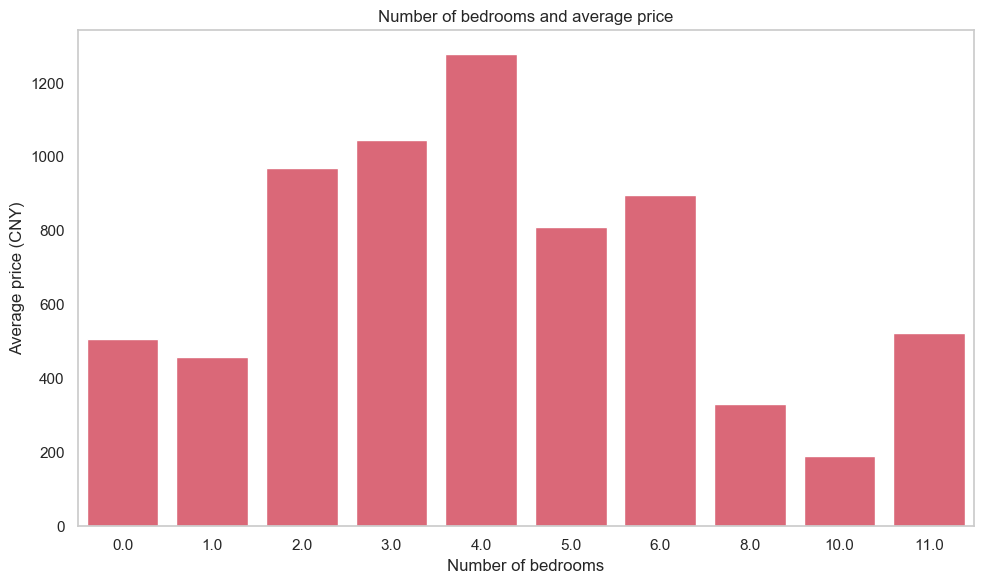

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入 FontProperties

# 创建一个透视表，计算每个卫生间数量对应的平均价格
pivot_table = data.groupby('bedrooms')['price'].mean().reset_index()

# 指定中文字体
font_path = '/Library/Fonts/Arial Unicode.ttf'  # 替换为实际字体路径
font_prop = FontProperties(fname=font_path)

# 设置全局字体
plt.rcParams['font.family'] = font_prop.get_name()

# 绘制可视化表格
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=pivot_table, color='#ed556a')  # 使用指定颜色
plt.title('Number of bedrooms and average price')
plt.xlabel('Number of bedrooms')
plt.ylabel('Average price (CNY)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# 显示图表
plt.tight_layout()

# 保存图表为图片
plt.savefig('Number of bedrooms and average price.png', dpi=300, bbox_inches='tight', format='png')  # 保存为 PNG 格式

plt.show()

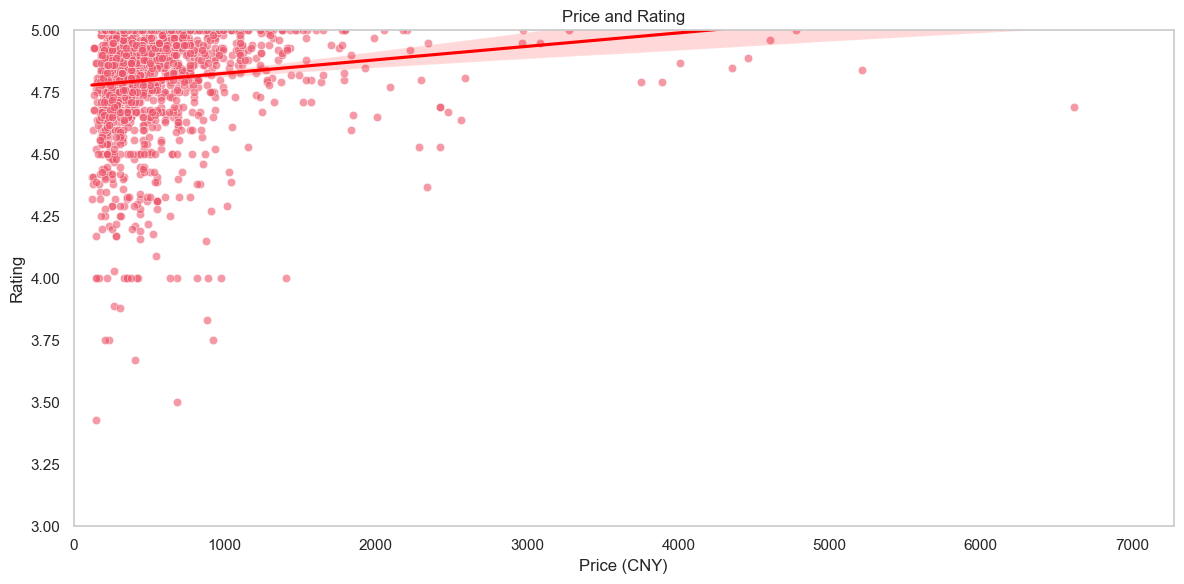

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 指定中文字体
font_path = '/Library/Fonts/Arial Unicode.ttf'  # 替换为实际字体路径
font_prop = FontProperties(fname=font_path)

# 设置全局字体
plt.rcParams['font.family'] = font_prop.get_name()

# 绘制散点图
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='rating', data=data, color='#ed556a', alpha=0.6)
sns.regplot(x='price', y='rating', data=data, scatter=False, color='red')  # 添加回归线，scatter=False 不显示散点

plt.title('Price and Rating')
plt.xlabel('Price (CNY)')
plt.ylabel('Rating')
plt.xlim(0, data['price'].max() * 1.1)  # 设置 x 轴范围
plt.ylim(3, 5)  # 设置 y 轴范围为 3 到 5
plt.grid()
plt.tight_layout()
# 保存图表为图片
plt.savefig('Price and Rating.png', dpi=300, bbox_inches='tight', format='png')  # 保存为 PNG 格式
plt.show()

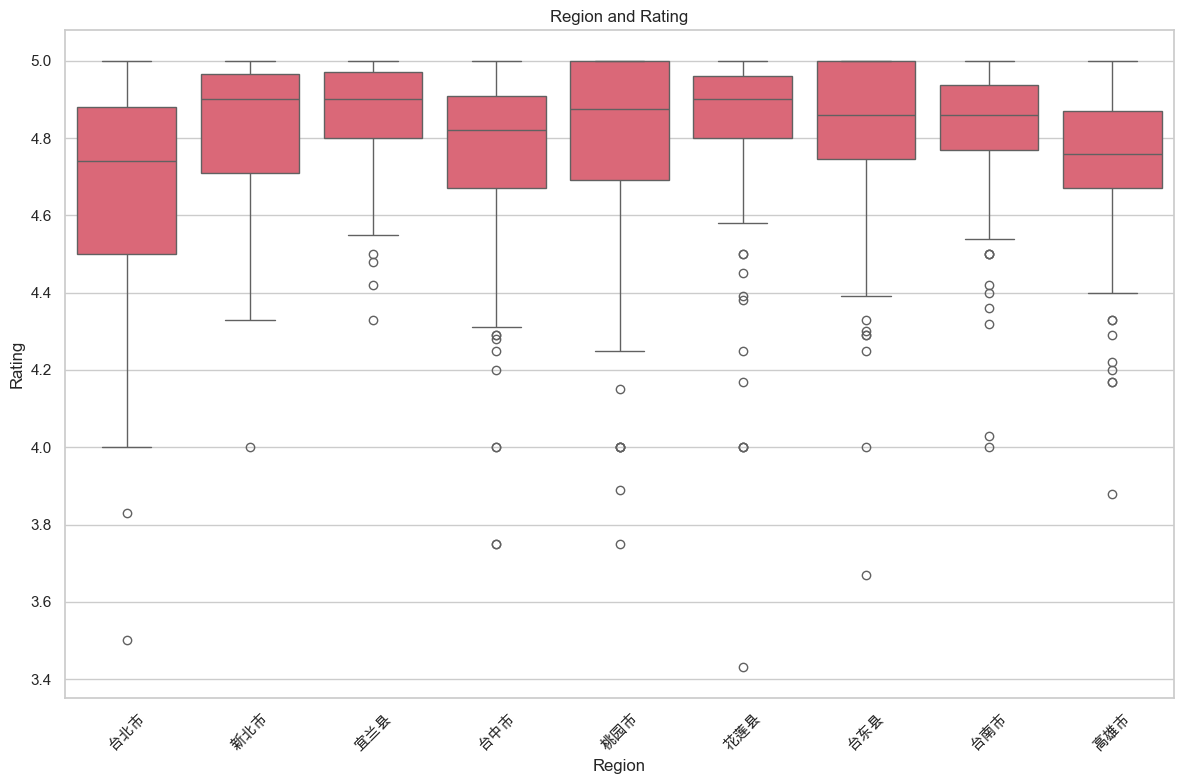

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入 FontProperties

# 设置绘图风格
sns.set(style="whitegrid")

# 指定中文字体
font_path = '/Library/Fonts/Arial Unicode.ttf'  # 替换为实际字体路径
font_prop = FontProperties(fname=font_path)

# 设置全局字体
plt.rcParams['font.family'] = font_prop.get_name()

# 绘制地区与评分的箱型图
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='rating', data=data, color='#ed556a')  # 使用指定颜色

# 设置标题和标签
plt.title('Region and Rating')
plt.xlabel('Region')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # 旋转 X 轴标签以便更好地显示

# 显示图表
plt.tight_layout()
# 保存图表为图片
plt.savefig('Price and Rating.png', dpi=300, bbox_inches='tight', format='png')  # 保存为 PNG 格式
plt.show()